# Classifying Yelp reviews

In [1]:
#import libraries

#data manipulation
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

#NLP
import nltk

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
#Create a column called "text length" which is the number of words in the text column
yelp["text length"]=yelp["text"].apply(len)

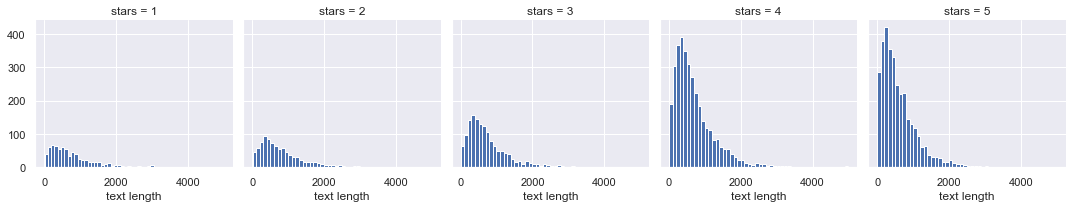

In [4]:
# Visualising text length depending on review stars

graph=sns.FacetGrid(data=yelp,col="stars")
graph.map(plt.hist,"text length",bins=50)

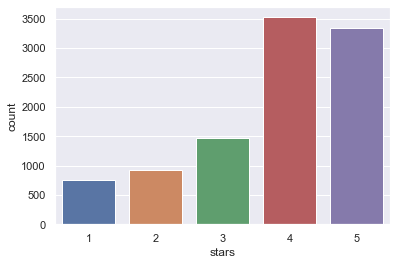

In [5]:
# Occurrences of different classifications

sns.countplot(data = yelp, x='stars')

In [6]:
# need to be careful as number of 1 vs 5 stars is quite unbalanced

In [7]:
# mean values of the numerical columns
yelp_bystar= yelp.groupby(by='stars')
yelp_bystar[['cool', 'useful', 'funny', 'text length']].mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


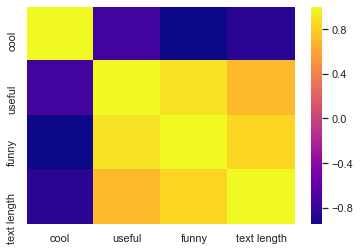

In [8]:
# visualise correlations between means of variables
yelp_corr=yelp_bystar.mean().corr()
sns.heatmap(yelp_corr, cmap='plasma')

In [30]:
# drop cols with stars 2, 3, 4 and balance df
yelp_class1=yelp[yelp.stars ==1]
yelp_class5=yelp[yelp.stars ==5]
dims = [yelp_class1.shape[0], yelp_class5.shape[0]]
min_dim = min(dims)

yelp_class1_balanced = yelp_class1.sample(min_dim, random_state=42)
yelp_class5_balanced = yelp_class5.sample(min_dim, random_state=42)

yelp_class = pd.concat([yelp_class1_balanced, yelp_class5_balanced])

#setup targets/labels
#X <- the 'text' column of yelp_class
X = yelp_class['text']
#y <- the 'stars' column of yelp_class.
y=yelp_class['stars']



#split between training/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#training a naive bayes model

from sklearn.naive_bayes import MultinomialNB
#Count vectorise data
from sklearn.feature_extraction.text import CountVectorizer
#Tfid transform
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

model = Pipeline([('conta', CountVectorizer()), 
         ('Tfi', TfidfTransformer()),
         ('mol',MultinomialNB())]
)


model.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('conta',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Tfi',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('mol',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [31]:
#Predictions and evaluations

y_pred=model.predict(X_test)

#score metrics
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[206   6]
 [ 76 162]]
              precision    recall  f1-score   support

           1       0.73      0.97      0.83       212
           5       0.96      0.68      0.80       238

    accuracy                           0.82       450
   macro avg       0.85      0.83      0.82       450
weighted avg       0.85      0.82      0.81       450

